# Canada Vigilance Adverse Reaction Online Database

https://www.canada.ca/en/health-canada/services/drugs-health-products/medeffect-canada/adverse-reaction-database/canada-vigilance-adverse-reaction-online-database-data-structures.html

The Canada Vigilance Adverse Reaction Online Database contains information about suspected adverse reactions (also known as side effects) to health products.

Adverse reaction reports are submitted by:

consumers and health professionals, who submit reports voluntarily
manufacturers and distributors (also known as market authorization holders), who are required to submit reports according to the Food and Drugs Act

This database includes data from 1965 to 2025-06-30.

Information about vaccines used for immunization has been included in the database since January 1, 2011. Information about human blood and blood components has been included in the database since September 1, 2015.

The database should not be used on its own to evaluate a health product's safety profile as It does not provide conclusive information on the safety of health products. It should not be used as a substitute for medical advice. If you have a medical concern, consult a qualified health professional. For more information, consult our Interpretation of suspected adverse reaction data page.

For general questions about the content of the Adverse Reaction Online Database or for technical support, please contact the Canada Vigilance Program.

In [ ]:
import polars as pl

PATH = "data/raw/Canada Vigilance Adverse Reaction Online Database/"

## Drug Product Ingredients

In [2]:
dpi = pl.read_parquet(PATH + "drug_product_ingredients.parquet")
dpi

DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,str,i64,str
29599010225,29599,"""BENZYDAMINE HYDROCHLORIDE/DICH…",10225,"""lidocaine hydrochloride"""
31212010225,31212,"""XYLOCAINE TOPICAL""",10225,"""lidocaine hydrochloride"""
54995010225,54995,"""BECLOMETHASONE DIPROPIONATE/LI…",10225,"""lidocaine hydrochloride"""
55044010225,55044,"""ALUMINUM HYDROXIDE/DIPHENHYDRA…",10225,"""lidocaine hydrochloride"""
58165010225,58165,"""LIDOCAINE HYDROCHLORIDE/NOREPI…",10225,"""lidocaine hydrochloride"""
…,…,…,…,…
3322005010254,33220,"""DIPHTHERIA TOXOID (+) PERTUSSI…",5010254,"""diphtheria toxoid (crm197)"""
3334505010254,33345,"""DTAP-IPV-HIB""",5010254,"""diphtheria toxoid (crm197)"""
3322705008968,33227,"""REACTINE UNSPECIFIED""",5008968,"""cetirizine hcl"""


## Reactions

In [9]:
reactions = pl.read_parquet(PATH + "reactions.parquet")
reactions

REACTION_ID,REPORT_ID,DURATION,DURATION_UNIT_ENG,DURATION_UNIT_FR,PT_NAME_ENG,PT_NAME_FR,SOC_NAME_ENG,SOC_NAME_FR,MEDDRA_VERSION
i64,i64,str,str,str,str,str,str,str,str
9701,97,"""""","""""","""""","""Accidental overdose""","""Surdosage accidentel""","""Injury, poisoning and procedur…","""Lésions, intoxications et comp…","""v.28.0"""
9801,98,"""""","""""","""""","""Completed suicide""","""Suicide""","""Psychiatric disorders""","""Affections psychiatriques""","""v.28.0"""
9901,99,"""""","""""","""""","""Accidental overdose""","""Surdosage accidentel""","""Injury, poisoning and procedur…","""Lésions, intoxications et comp…","""v.28.0"""
10001,100,"""""","""""","""""","""Accidental overdose""","""Surdosage accidentel""","""Injury, poisoning and procedur…","""Lésions, intoxications et comp…","""v.28.0"""
10101,101,"""""","""""","""""","""Dizziness""","""Sensation vertigineuse""","""Nervous system disorders""","""Affections du système nerveux""","""v.28.0"""
…,…,…,…,…,…,…,…,…,…
90803319501,908033195,"""""","""""","""""","""Drug ineffective""","""Inefficacité médicamenteuse""","""General disorders and administ…","""Troubles généraux et anomalies…","""v.28.0"""
90803320103,908033201,"""""","""""","""""","""Stomatitis""","""Stomatite""","""Gastrointestinal disorders""","""Affections gastro-intestinales""","""v.28.0"""
90803320102,908033201,"""""","""""","""""","""Abdominal distension""","""Distension abdominale""","""Gastrointestinal disorders""","""Affections gastro-intestinales""","""v.28.0"""


## Report Drug Indications

In [12]:
rdi = pl.read_parquet(PATH + "report_drug_indication.parquet")
rdi

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,INDICATION_NAME_ENG,INDICATION_NAME_FR
i64,i64,i64,str,str,str
3973977,300792,9496,"""ADVIL COLD & SINUS LIQUI-GELS""","""Nasopharyngitis""","""Rhinopharyngite"""
3893241,300764,31952,"""CODEINE""","""Product used for unknown indic…","""Produit utilisé pour une indic…"
3974079,300440,9589,"""FORTEO""","""Osteoporosis""","""Ostéoporose"""
3977017,300944,29039,"""MIRTAZAPINE""","""Insomnia""","""Insomnie"""
3983680,301511,10737,"""CHAMPIX""","""Smoking cessation therapy""","""Traitement pour arrêter de fum…"
…,…,…,…,…,…
5295423,908147986,16362,"""QULIPTA""","""Migraine""","""Migraine"""
4956401,907353481,24811,"""ROPIVACAINE HYDROCHLORIDE""","""Product used for unknown indic…","""Produit utilisé pour une indic…"
5213285,908120465,52875,"""DICLOFENAC POTASSIUM""","""Product used for unknown indic…","""Produit utilisé pour une indic…"


## Report Drug

In [3]:
report_drug = pl.read_parquet(PATH + "report_drug.parquet")
# if it ends with _FR drop the column
fr_cols = [col for col in report_drug.columns if col.endswith("_FR")]
report_drug = report_drug.drop(fr_cols)
report_drug

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str
4419402,164,3503,"""LARGACTIL 50""","""Concomitant""","""Intramuscular""","""50""","""Milligram""","""""","""""","""""","""""","""1""","""Days""","""SOLUTION INTRAMUSCULAR"""
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Oral""","""10""","""Milligram""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED"""
4419403,164,656,"""LASIX PARENTERAL INJ""","""Concomitant""","""Intravenous (not otherwise spe…","""40""","""Milligram""","""""","""""","""""","""""","""""","""""","""LIQUID INTRAMUSCULAR"""
4419406,164,1625,"""APRESOLINE INJECTION 20MG/AMPO…","""Concomitant""","""Intramuscular""","""20""","""Milligram""","""""","""""","""""","""""","""1""","""Days""","""POWDER FOR SOLUTION INTRAVENOU…"
4419404,164,24440,"""KEFLIN""","""Suspect""","""""","""1""","""Gram""","""4""","""1""","""Days""","""4 every 1 Days""","""""","""""","""POWDER FOR SOLUTION INTRAMUSCU…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4949073,908149644,58275,"""CEPHALEXIN""","""Concomitant""","""Unknown""","""250""","""Milligram""","""1""","""""","""""","""""","""""","""""",""""""
4949077,908149644,31567,"""MYRBETRIQ""","""Concomitant""","""Unknown""","""50""","""Milligram""","""1""","""""","""""","""""","""""","""""","""TABLET (EXTENDED-RELEASE)"""
4949078,908149644,33553,"""ACETYLSALICYLIC ACID""","""Concomitant""","""Unknown""","""81""","""Milligram""","""1""","""""","""""","""""","""""","""""","""NOT SPECIFIED"""


In [5]:
dpi

DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,str,i64,str
29599010225,29599,"""BENZYDAMINE HYDROCHLORIDE/DICH…",10225,"""lidocaine hydrochloride"""
31212010225,31212,"""XYLOCAINE TOPICAL""",10225,"""lidocaine hydrochloride"""
54995010225,54995,"""BECLOMETHASONE DIPROPIONATE/LI…",10225,"""lidocaine hydrochloride"""
55044010225,55044,"""ALUMINUM HYDROXIDE/DIPHENHYDRA…",10225,"""lidocaine hydrochloride"""
58165010225,58165,"""LIDOCAINE HYDROCHLORIDE/NOREPI…",10225,"""lidocaine hydrochloride"""
…,…,…,…,…
3322005010254,33220,"""DIPHTHERIA TOXOID (+) PERTUSSI…",5010254,"""diphtheria toxoid (crm197)"""
3334505010254,33345,"""DTAP-IPV-HIB""",5010254,"""diphtheria toxoid (crm197)"""
3322705008968,33227,"""REACTINE UNSPECIFIED""",5008968,"""cetirizine hcl"""


In [75]:
# view in dpi where drugname is "ASPIRIN"
dpi.filter(pl.col("DRUGNAME") == "XYLOCAINE TOPICAL")

DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,str,i64,str
31212010225,31212,"""XYLOCAINE TOPICAL""",10225,"""lidocaine hydrochloride"""
3121205007649,31212,"""XYLOCAINE TOPICAL""",5007649,"""lidocaine hcl"""
312120640,31212,"""XYLOCAINE TOPICAL""",640,"""lignocaine hydrochloride"""
3121205012654,31212,"""XYLOCAINE TOPICAL""",5012654,"""lidocain hydrochloride"""


In [31]:
# join reportdrug DRUG_PRODUCT_ID with dpi DRUG_PRODUCT_ID and attach ACTIVE_INGREDIENT_NAME
report_drug = report_drug.join(dpi, on="DRUG_PRODUCT_ID")
report_drug

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_right,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str
4081112,85414,35219,"""LITHIUM""","""Concomitant""","""Oral""","""900""","""Milligram""","""""","""""","""""","""""","""8""","""Days""","""NOT SPECIFIED""",35219010227,"""LITHIUM""",10227,"""lithium carbonate"""
4008230,125775,35219,"""LITHIUM""","""Concomitant""","""Unknown""","""300""","""Milligram""","""""","""1""","""Days""",""" every 1 Days""","""""","""""","""NOT SPECIFIED""",35219010227,"""LITHIUM""",10227,"""lithium carbonate"""
188583,127032,35219,"""LITHIUM""","""Concomitant""","""Oral""","""300""","""Milligram""","""""","""1""","""Days""",""" every 1 Days""","""""","""""","""NOT SPECIFIED""",35219010227,"""LITHIUM""",10227,"""lithium carbonate"""
4111673,133363,35219,"""LITHIUM""","""Concomitant""","""Unknown""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",35219010227,"""LITHIUM""",10227,"""lithium carbonate"""
3982162,147930,35219,"""LITHIUM""","""Concomitant""","""Unknown""","""600""","""Milligram""","""2""","""1""","""Days""","""2 every 1 Days""","""20""","""Days""","""NOT SPECIFIED""",35219010227,"""LITHIUM""",10227,"""lithium carbonate"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1586174,939630,9565,"""INFANRIX-HEXA""","""Concomitant""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",956505010546,"""INFANRIX-HEXA""",5010546,"""tetanus toxoids"""
1586174,939630,9565,"""INFANRIX-HEXA""","""Concomitant""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",956505014497,"""INFANRIX-HEXA""",5014497,"""​tetanus vaccine toxoid"""
1704962,927895,33345,"""DTAP-IPV-HIB""","""Concomitant""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",3334505010254,"""DTAP-IPV-HIB""",5010254,"""diphtheria toxoid (crm197)"""


In [89]:
ups = report_drug.filter(pl.col("REPORT_ID") == 902245268)


ups.head(10)

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str
2450200,902245268,35591,"""BREO ELLIPTA""","""Suspect""","""Unknown""","""""","""""","""""","""""","""""","""""","""""","""""","""INHALATION"""
2450202,902245268,34020,"""SYMBICORT TURBUHALER""","""Suspect""","""Inhalation""","""2""","""Dosage forms""","""4""","""1""","""Days""","""4 every 1 Days""","""""","""""","""Powder"""
2450209,902245268,9945,"""TECTA""","""Concomitant""","""Unknown""","""40""","""Milligram""","""1""","""1""","""Days""","""1 every 1 Days""","""""","""""","""TABLET (ENTERIC-COATED)"""
2450198,902245268,7253,"""SPIRIVA""","""Suspect""","""Inhalation""","""1""","""Dosage forms""","""1""","""1""","""Days""","""1 every 1 Days""","""""","""""","""Capsules"""
2450205,902245268,59928,"""AMMONIA""","""Suspect""","""Unknown""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
2450197,902245268,49964,"""SALBUTAMOL SULFATE""","""Suspect""","""Inhalation""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
2450207,902245268,5773,"""NASONEX""","""Concomitant""","""Unknown""","""2""","""Dosage forms""","""""","""""","""""","""""","""""","""""","""SPRAY, METERED DOSE"""
2450203,902245268,25112,"""PREDNISONE""","""Suspect""","""Unknown""","""20""","""Milligram""","""1""","""1""","""Days""","""1 every 1 Days""","""""","""""","""NOT SPECIFIED"""
2450208,902245268,28502,"""SINUS RINSE""","""Concomitant""","""Unknown""","""""","""""","""2""","""1""","""Days""","""2 every 1 Days""","""""","""""","""SOLUTION NASAL"""


In [73]:
counts = report_drug['ACTIVE_INGREDIENT_NAME'].value_counts()
sorted_counts = counts.sort(by='count', descending=True)
sorted_counts

ACTIVE_INGREDIENT_NAME,count
str,u32
"""metformine hydrochloride""",10930
"""candesartan cilexetil""",8278
"""cefuroxime salt not specified""",7692
"""cefuroxime""",7692
"""salbutamol""",7470
…,…
"""ammonium bithiolicum""",1
"""proparacaine""",1
"""calcium d-saccharate""",1


Removed 1414859 items with count <= 0. Remaining items: 7785
Removed 1407 items with count <= 1. Remaining items: 6378
Removed 860 items with count <= 2. Remaining items: 5518
Removed 358 items with count <= 3. Remaining items: 5160
Removed 402 items with count <= 4. Remaining items: 4758
Removed 203 items with count <= 5. Remaining items: 4555
Removed 231 items with count <= 6. Remaining items: 4324
Removed 141 items with count <= 7. Remaining items: 4183
Removed 168 items with count <= 8. Remaining items: 4015
Removed 96 items with count <= 9. Remaining items: 3919
Removed 162 items with count <= 10. Remaining items: 3757
Removed 94 items with count <= 11. Remaining items: 3663
Removed 111 items with count <= 12. Remaining items: 3552
Removed 107 items with count <= 13. Remaining items: 3445
Removed 97 items with count <= 14. Remaining items: 3348
Removed 33 items with count <= 15. Remaining items: 3315
Removed 67 items with count <= 16. Remaining items: 3248
Removed 41 items with co

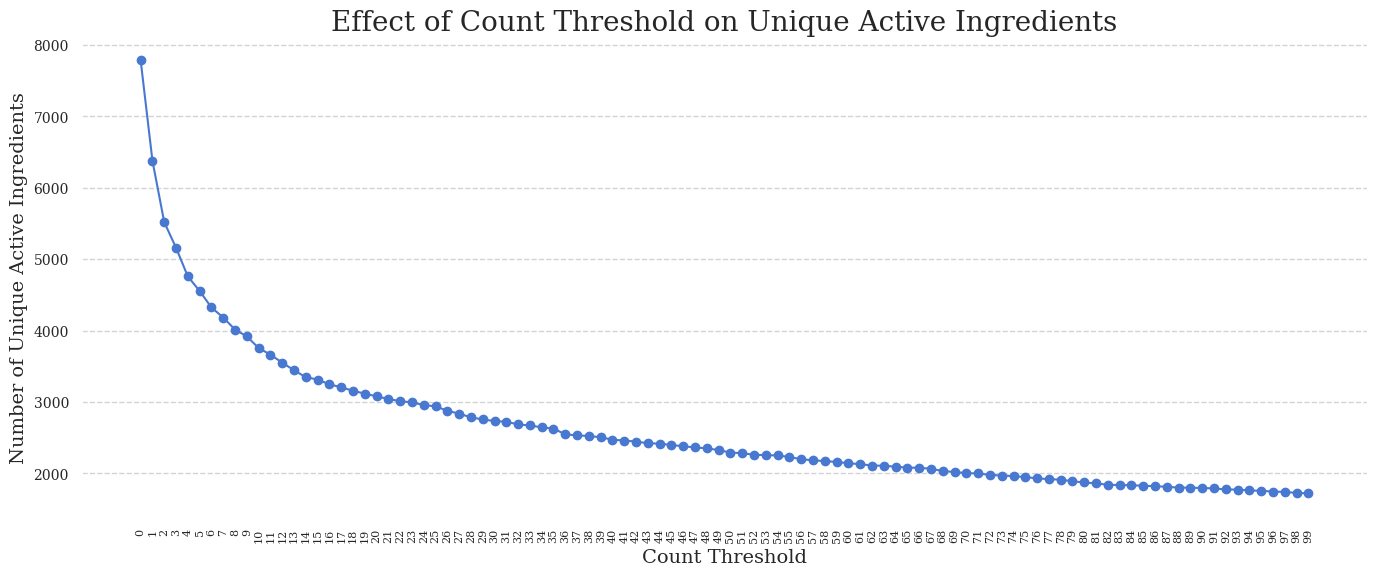

In [65]:
total_length = [len(report_drug)]

r = 100
# keep if count is more than 1
for i in range (r):
    sorted_counts = sorted_counts.filter(pl.col('count') > i)
    current_length = len(sorted_counts)
    removed = total_length[-1] - current_length
    total_length.append(current_length)
    print(f"Removed {removed} items with count <= {i}. Remaining items: {current_length}")

# plot the lengths
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(range(r), total_length[1:], marker='o')   
plt.xlabel('Count Threshold')
plt.ylabel('Number of Unique Active Ingredients')
plt.title('Effect of Count Threshold on Unique Active Ingredients')
plt.grid(axis='x')
plt.xticks(range(r), rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

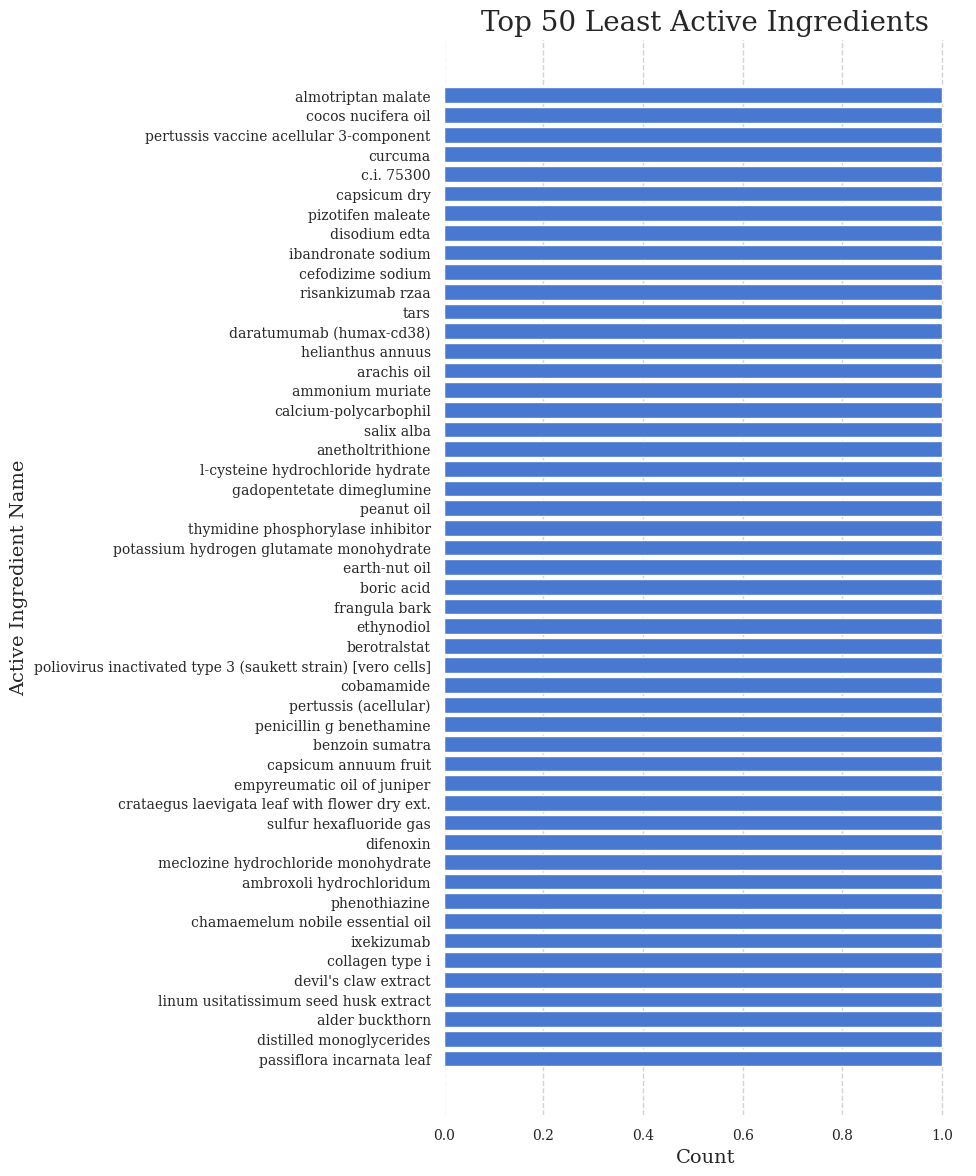

In [36]:
# plot the top 50
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import style
style.mpl_apply()

# Get the top 50
top_50 = sorted_counts.tail(50)

# Plot
plt.figure(figsize=(10, 12))
plt.barh(top_50['ACTIVE_INGREDIENT_NAME'], top_50['count'])
plt.xlabel('Count')
plt.ylabel('Active Ingredient Name')
plt.title('Top 50 Least Active Ingredients')
# hide x line grids
plt.grid(axis='y')
plt.gca().invert_yaxis()  # To have the highest at the top
plt.tight_layout()
plt.savefig("visualizations/canada2/top_50_least_active_ingredients.pdf")
plt.show()


In [ ]:
# First, group dpi by DRUG_PRODUCT_ID and collect ACTIVE_INGREDIENT_NAME into a list
dpi_grouped = dpi.group_by("DRUG_PRODUCT_ID").agg(pl.col("ACTIVE_INGREDIENT_NAME").alias("ACTIVE_INGREDIENT_NAMES"))

# Then, left join report_drug with dpi_grouped on DRUG_PRODUCT_ID to attach the list without duplicating rows
report_drug = report_drug.join(dpi_grouped, on="DRUG_PRODUCT_ID", how="left")
report_drug

In [37]:
# sort report_id
report_drug = report_drug.sort(by='REPORT_ID')
report_drug

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_right,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str
288210,3011,35344,"""CHLOR-TRIPOLON""","""Concomitant""","""Oral""","""8""","""Milligram""","""3""","""1""","""Days""","""3 every 1 Days""","""""","""""","""NOT SPECIFIED""",35344010259,"""CHLOR-TRIPOLON""",10259,"""chlorpheniramine maleate"""
288213,3011,32040,"""DALACIN C""","""Suspect""","""Intravenous (not otherwise spe…","""600""","""Milligram""","""4""","""1""","""Days""","""4 every 1 Days""","""18""","""Days""","""Injection""",3204008551,"""DALACIN C""",8551,"""clindamycin"""
288211,3011,30586,"""INSULIN""","""Concomitant""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",3058607326,"""INSULIN""",7326,"""insulin"""
288211,3011,30586,"""INSULIN""","""Concomitant""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",30586020125,"""INSULIN""",20125,"""insulin (human)"""
288211,3011,30586,"""INSULIN""","""Concomitant""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",3058605002283,"""INSULIN""",5002283,"""insulin (animal)"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4956837,908148234,24992,"""AMOXICILLIN TRIHYDRATE/CLAVULA…","""Concomitant""","""""","""""","""""","""1""","""12""","""Hours""","""1 every 12 Hours""","""""","""""","""""",2499208335,"""AMOXICILLIN TRIHYDRATE/CLAVULA…",8335,"""potassium clavulanate"""
4956837,908148234,24992,"""AMOXICILLIN TRIHYDRATE/CLAVULA…","""Concomitant""","""""","""""","""""","""1""","""12""","""Hours""","""1 every 12 Hours""","""""","""""","""""",2499205012063,"""AMOXICILLIN TRIHYDRATE/CLAVULA…",5012063,"""potassium clavulanic acid"""
4956841,908148234,33660,"""NAPROXEN""","""Concomitant""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",3366006005843,"""NAPROXEN""",6005843,"""naproxen piperazine"""


In [32]:
report_drug['DRUGNAME'].unique()

DRUGNAME
str
"""VICTOZA MULTIDOSE PEN-INJECTOR…"
"""APO-PEN-VK"""
"""SAXAGLIPTIN"""
"""CIPRODEX …"
"""DEXTROMETHORPHAN HYDROBROMIDE/…"
…
"""LEUPRORELIN"""
"""ELECTROLYTES"""
"""EFUDEX"""


In [28]:
for dose in report_drug['DOSE_UNIT_ENG'].unique():
    print(dose)

arbitrary unit
Nanogram
Curies
MU
International units thousands
Units
Teaspoonful
IU/kg

Milligram
Microgram
ml
Milligram/Milliliter
gram per kilogram
Grain
femtogram
ug/kg
international unit per gram
Dram
Liters
milli-international unit
Unknown
Other
Percent
gram per  kilogram per 8 hour
mg/kg
Gram
Dosage forms
MBq
Millicuries
Gtt
International units millions
IU (International Unit)
mg/m2
million international unit
Drops
ul
Milliequivalents
Millimol


In [31]:
# counts
for routeadmin in report_drug['ROUTEADMIN_ENG'].unique():
    print(routeadmin)

Irrigation
Feeding tube
Systemic
Intra-nasal
Local infiltration
Dental
Rectal
Ophthalmic
Subdermal
Auricular (otic)
Intravesical
Endocervical
Intramuscular
Intravenous (not otherwise specified)
Intrapleural
Other
Intraocular
Parenteral
Intracardiac
Cutaneous
Intra corpus cavernosum
Buccal
Transmammary
Vaginal
Endotracheal
Topical
Intradermal
Subconjunctival
Sublingual
Intracavernous
Intravenous drip
Endosinusial
Subcutaneous
Intravenous bolus

Intra-amniotic
Intrathecal
Transplacental
Oral
Intramedullar (bone marrow)
Intradiscal (Intraspinal)
Epidural
Oropharingeal
Intra-arterial
Unknown
Intra-uterine
Inhalation
Intratracheal
Intra-articular
Urethral
Intraperitoneal
Transdermal


In [25]:
# count unique reports
report_drug.select(pl.col("REPORT_ID").n_unique())

REPORT_ID
u32
8686


## Reports

In [36]:
report = pl.read_parquet(PATH + "reports.parquet")
report

REPORT_ID,REPORT_NO,VERSION_NO,DATRECEIVED,DATINTRECEIVED,MAH_NO,REPORT_TYPE_CODE,REPORT_TYPE_ENG,REPORT_TYPE_FR,GENDER_CODE,GENDER_ENG,GENDER_FR,AGE,AGE_Y,AGE_UNIT_ENG,AGE_UNIT_FR,OUTCOME_CODE,OUTCOME_ENG,OUTCOME_FR,WEIGHT,WEIGHT_UNIT_ENG,WEIGHT_UNIT_FR,HEIGHT,HEIGHT_UNIT_ENG,HEIGHT_UNIT_FR,SERIOUSNESS_CODE,SERIOUSNESS_ENG,SERIOUSNESS_FR,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,REPORTER_TYPE_FR,SOURCE_CODE,SOURCE_ENG,SOURCE_FR,E2B_IMP_SAFETYREPORT_ID,AUTHORITY_NUMB,COMPANY_NUMB
i64,i64,i64,str,str,str,i64,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
1,1,0,"""05-JUN-73""","""05-JUN-73""","""""",7,"""Spontaneous""","""Déclaration spontanée""","""2""","""Female""","""Féminin""","""62""","""62""","""Years""","""Années""",6,"""Unknown""","""Inconnue""","""66""","""Kilogram""","""Kilogramme""","""155""","""Centimeter""","""Centimètres""",2,"""Not Serious""","""Non grave""","""""","""""","""""","""""","""""","""""","""Physician""","""Physicien""","""""","""""","""""","""""","""""",""""""
2,2,0,"""05-JUN-73""","""05-JUN-73""","""""",7,"""Spontaneous""","""Déclaration spontanée""","""2""","""Female""","""Féminin""","""70""","""70""","""Years""","""Années""",6,"""Unknown""","""Inconnue""","""""","""""","""""","""""","""""","""""",2,"""Not Serious""","""Non grave""","""""","""""","""""","""""","""""","""""","""""","""""","""03""","""Hospital""","""Hôpital""","""""","""""",""""""
3,3,0,"""05-JUN-73""","""05-JUN-73""","""""",7,"""Spontaneous""","""Déclaration spontanée""","""1""","""Male""","""Masculin""","""83""","""83""","""Years""","""Années""",6,"""Unknown""","""Inconnue""","""44""","""Kilogram""","""Kilogramme""","""173""","""Centimeter""","""Centimètres""",1,"""Serious""","""Grave""","""""","""""","""""","""""","""""","""""","""""","""""","""03""","""Hospital""","""Hôpital""","""""","""""",""""""
4,4,0,"""05-JUN-73""","""05-JUN-73""","""""",7,"""Spontaneous""","""Déclaration spontanée""","""2""","""Female""","""Féminin""","""78""","""78""","""Years""","""Années""",6,"""Unknown""","""Inconnue""","""""","""""","""""","""""","""""","""""",1,"""Serious""","""Grave""","""""","""""","""""","""""","""""","""""","""""","""""","""03""","""Hospital""","""Hôpital""","""""","""""",""""""
5,5,0,"""05-JUN-73""","""05-JUN-73""","""""",7,"""Spontaneous""","""Déclaration spontanée""","""2""","""Female""","""Féminin""","""55""","""55""","""Years""","""Années""",6,"""Unknown""","""Inconnue""","""""","""""","""""","""""","""""","""""",2,"""Not Serious""","""Non grave""","""""","""""","""""","""""","""""","""""","""""","""""","""01""","""Community""","""Communauté""","""""","""""",""""""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
908151570,null,0,"""30-JUN-25""","""30-JUN-25""","""202501618""",8,"""Study""","""Étude""","""1""","""Male""","""Masculin""","""75""","""75""","""Years""","""Années""",11,"""Fatal""","""Fatale""","""""","""""","""""","""""","""""","""""",1,"""Serious""","""Grave""","""1""","""2""","""2""","""2""","""2""","""1""","""Other health professional""","""Autre professionnel de santé""","""07""","""MAH""","""Fabricant""","""CA-HLS-202501618""","""""","""CA-HLS-202501618"""
908151575,null,0,"""30-JUN-25""","""30-JUN-25""","""2025033697""",8,"""Study""","""Étude""","""2""","""Female""","""Féminin""","""42""","""42""","""Years""","""Années""",9,"""Not recovered/not resolved""","""Non rétabli/Non résolu""","""""","""""","""""","""""","""""","""""",1,"""Serious""","""Grave""","""2""","""2""","""2""","""2""","""2""","""1""","""""","""""","""07""","""MAH""","""Fabricant""","""CA-UCBSA-2025033697""","""""","""CA-UCBSA-2025033697"""
908151595,null,0,"""30-JUN-25""","""30-JUN-25""","""2025TUS040335""",8,"""Study""","""Étude""","""2""","""Female""","""Féminin""","""22""","""22""","""Years""","""Années""",8,"""Recovering/resolving""","""Guérison e

In [37]:
# if it ends with _FR drop the column
fr_cols = [col for col in report.columns if col.endswith("_FR")]
report = report.drop(fr_cols)

In [ ]:
# drop SERIOUSNESS_CODE	SERIOUSNESS_ENG	DEATH	DISABILITY	CONGENITAL_ANOMALY	LIFE_THREATENING	HOSP_REQUIRED	OTHER_MEDICALLY_IMP_COND	REPORTER_TYPE_ENG	SOURCE_CODE	SOURCE_ENG	E2B_IMP_SAFETYREPORT_ID	AUTHORITY_NUMB	COMPANY_NUMB REPORT_TYPE_CODE	REPORT_TYPE_ENG	GENDER_CODE
report = report.drop([
    "SERIOUSNESS_CODE",
    "SERIOUSNESS_ENG",
    "DEATH",
    "DISABILITY",
    "CONGENITAL_ANOMALY",
    "LIFE_THREATENING",
    "HOSP_REQUIRED",
    "OTHER_MEDICALLY_IMP_COND",
    "REPORTER_TYPE_ENG",
    "SOURCE_CODE",
    "SOURCE_ENG",
    "E2B_IMP_SAFETYREPORT_ID",
    "AUTHORITY_NUMB",
    "COMPANY_NUMB",
    "MAH_NO", 
    "REPORT_TYPE_CODE",
    "REPORT_TYPE_ENG",
    "GENDER_CODE", 
    "OUTCOME_ENG", 
    "VERSION_NO",
    "REPORT_NO",
    "OUTCOME_CODE",
    "DATINTRECEIVED",
    "AGE_UNIT_ENG",
    "AGE"
])


In [39]:
report

REPORT_ID,DATRECEIVED,GENDER_ENG,AGE,AGE_Y,WEIGHT,WEIGHT_UNIT_ENG,HEIGHT,HEIGHT_UNIT_ENG
i64,str,str,str,str,str,str,str,str
1,"""05-JUN-73""","""Female""","""62""","""62""","""66""","""Kilogram""","""155""","""Centimeter"""
2,"""05-JUN-73""","""Female""","""70""","""70""","""""","""""","""""",""""""
3,"""05-JUN-73""","""Male""","""83""","""83""","""44""","""Kilogram""","""173""","""Centimeter"""
4,"""05-JUN-73""","""Female""","""78""","""78""","""""","""""","""""",""""""
5,"""05-JUN-73""","""Female""","""55""","""55""","""""","""""","""""",""""""
…,…,…,…,…,…,…,…,…
908151570,"""30-JUN-25""","""Male""","""75""","""75""","""""","""""","""""",""""""
908151575,"""30-JUN-25""","""Female""","""42""","""42""","""""","""""","""""",""""""
908151595,"""30-JUN-25""","""Female""","""22""","""22""","""""","""""","""""",""""""


In [42]:
report.write_parquet("data/processed2/reports.parquet")

# Clean report

In [14]:
import pandas as pd
import numpy as np
report = pd.read_parquet("data/processed2/reports.parquet")

In [15]:
report

,REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT,WEIGHT_UNIT_ENG,HEIGHT,HEIGHT_UNIT_ENG
0,1,05-JUN-73,Female,62,66,Kilogram,155,Centimeter
1,2,05-JUN-73,Female,70,,,,
2,3,05-JUN-73,Male,83,44,Kilogram,173,Centimeter
3,4,05-JUN-73,Female,78,,,,
4,5,05-JUN-73,Female,55,,,,
...,...,...,...,...,...,...,...,...
1197908,908151570,30-JUN-25,Male,75,,,,
1197909,908151575,30-JUN-25,Female,42,,,,
1197910,908151595,30-JUN-25,Female,22,,,,
1197911,908151596,30-JUN-25,Male,34,,,,


In [20]:
weight_unit_map = {
    'Kilogram': 1,
    'Pound': 0.453592,
    'Ounce': 0.02834957,
    'Unkwn': 1
}

height_unit_map = {
    'Centimeter': 1,
    'Inch': 2.54
}

# make the columns numeric
report['WEIGHT'] = pd.to_numeric(report['WEIGHT'], errors='coerce')
report['HEIGHT'] = pd.to_numeric(report['HEIGHT'], errors='coerce')

# Create a new column 'WEIGHT_KG' by mapping and multiplying
report['WEIGHT_KG'] = report['WEIGHT'] * report['WEIGHT_UNIT_ENG'].map(weight_unit_map)
report['WEIGHT_KG'] = report['WEIGHT_KG'].fillna(np.nan)
report['HEIGHT_CM'] = report['HEIGHT'] * report['HEIGHT_UNIT_ENG'].map(height_unit_map)
report['HEIGHT_CM'] = report['HEIGHT_CM'].fillna(np.nan)

# drop WEIGHT	WEIGHT_UNIT_ENG	HEIGHT	HEIGHT_UNIT_ENG
report = report.drop(columns=['WEIGHT', 'WEIGHT_UNIT_ENG', 'HEIGHT', 'HEIGHT_UNIT_ENG'])

# make DATINTRECEIVED a datetime 05-JUN-73 to 1973-06-05
report['DATRECEIVED'] = pd.to_datetime(report['DATRECEIVED'], errors='coerce', format='%d-%b-%y')

# save to reports_cleaned.parquet
report.to_parquet("data/processed2/reports_cleaned.parquet")

report

,REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM
0,1,1973-06-05,Female,62,66.0,155.0
1,2,1973-06-05,Female,70,NaN,NaN
2,3,1973-06-05,Male,83,44.0,173.0
3,4,1973-06-05,Female,78,NaN,NaN
4,5,1973-06-05,Female,55,NaN,NaN
...,...,...,...,...,...,...
1197908,908151570,2025-06-30,Male,75,NaN,NaN
1197909,908151575,2025-06-30,Female,42,NaN,NaN
1197910,908151595,2025-06-30,Female,22,NaN,NaN
1197911,908151596,2025-06-30,Male,34,NaN,NaN
